In [1]:
import numpy as np
import networkx as nx
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sets import Set

C:\Users\mathieu\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: the sets module is deprecated


In [2]:
with open("training_set.txt", "r") as f:
    reader = csv.reader(f)
    training_set  = list(reader)
training_set = [element[0].split(" ") for element in training_set]

In [3]:
with open("node_information.csv", "r") as f:
    reader = csv.reader(f)
    node_info  = list(reader)

IDs = [element[0] for element in node_info]
print len(IDs)

27770


In [4]:
training_set[0]

['9510123', '9502114', '1']

On selectionne les couples d'articles qui sont liés

In [5]:
couple_article = [ [id1,id2] for id1, id2, edge in training_set if int(edge) ==1 ] 
list_couple_article_without_edge = [ [id1,id2] for id1, id2, edge in training_set if int(edge) ==0 ] 

## Number of times an Id appears in the training set

In [6]:
dict_id_article = {}
for ids in IDs:
    dict_id_article[ids]=0
for id1, id2, edge in training_set:
    dict_id_article[id1] += 1

In [7]:
#plt.hist(dict_id_article.values(),100)

In [8]:
couple_article[0]

['9510123', '9502114']

In [9]:
graph_article = nx.Graph(couple_article)
G=graph_article
#add isolated nodes
G.add_nodes_from(IDs)

In [10]:

print 'Number of nodes:', G.number_of_nodes() 
print 'Number of edges:', G.number_of_edges() 
print 'Number of connected components:', nx.number_connected_components(G)

# Connected components
GCC=list(nx.connected_component_subgraphs(G))[0]

# Fraction of nodes and edges in GCC 
print "Fraction of nodes in GCC: ", float(GCC.number_of_nodes()) / G.number_of_nodes()
print "Fraction of edges in GCC: ", float(GCC.number_of_edges()) / G.number_of_edges()

Number of nodes: 27770
Number of edges: 334690
Number of connected components: 239
Fraction of nodes in GCC:  0.982535109831
Fraction of edges in GCC:  0.999127550868


Min degree  0
Max degree  2346
Median degree  13.0
Mean degree  24.1044292402


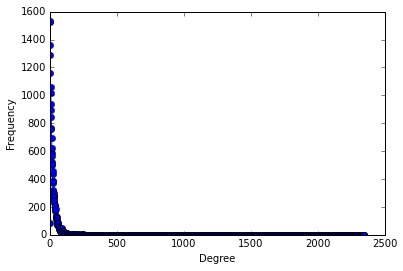

In [11]:
# Degree
degree_sequence = G.degree().values()
print "Min degree ", np.min(degree_sequence)
print "Max degree ", np.max(degree_sequence)
print "Median degree ", np.median(degree_sequence)
print "Mean degree ", np.mean(degree_sequence)

# Degree distribution
y=nx.degree_histogram(G)
plt.figure(1)
plt.plot(y,'b-',marker='o')
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.draw()
plt.show()

# Import test set

Il n'y a pas de nouveaux noeuds dans le testing set.

In [12]:
with open("testing_set.txt", "r") as f:
    reader = csv.reader(f)
    test_set  = list(reader)
test_set = [element[0].split(" ") for element in test_set]

In [13]:
test_set[0]

['9807076', '9807139']

In [14]:
set_node_train = {training_set[0][0]}
for id1, id2, edge in training_set:
    set_node_train.add(id1)
    set_node_train.add(id2)

In [15]:
set_node_test = {test_set[0][0]}
for id1, id2 in test_set:
    set_node_test.add(id1)
    set_node_test.add(id2)

In [16]:
print len(set_node_test)
print len(set_node_train)

23402
27770


In [17]:
set_node_test.difference(set_node_train)

set()

In [18]:
len(set_node_train.difference(set_node_test))

4368

# Local edge-connectivity

In [33]:
from networkx.algorithms.connectivity import local_edge_connectivity
from networkx.algorithms.connectivity import local_node_connectivity
from networkx.algorithms import approximation as approx

In [34]:
id1,id2,edge=training_set[0]

In [35]:
local_edge_connectivity(G,id1,id2)

6

In [36]:
local_node_connectivity(G,id1,id2)

NameError: name 'local_node_connectivity' is not defined

In [37]:
approx.local_node_connectivity(G, id1, id2)

6

In [ ]:
list_local_node_connectivity_train = []
compt=0
for id1, id2, edge in training_set:
    if compt % 1000 == 0:
        print compt
    compt +=1
    local_con = approx.local_node_connectivity(G,id1,id2)
    list_local_node_connectivity_train.append([id1,id2,local_con])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000

In [ ]:
list_local_node_connectivity_train[0]

In [ ]:
with open("local_node_connectivity.txt", "w") as w:
    csv_out = csv.writer(w)
    for row in list_local_node_connectivity_train:
        csv_out.writerow([row[0],row[1],row[2]])